In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

data_files = os.listdir('./data2_csv')
korea_file = []

for file in data_files:
    if file == '.DS_Store':
        continue
    elif 'Korea__Republic_of' in file:
        korea_file.append(file)

In [8]:
korea_import_dic = dict()
korea_export_dic = dict()

for file in korea_file :
    if file == '.DS_Store':
        continue
    c1, c2 = file[49:].split('and')
    frist, second = c1[:-1], c2[1:-4]
    if frist == 'Korea__Republic_of':
        korea_import_dic[second] = file
    else:
        korea_export_dic[frist] = file
        
# len(korea_import_dic), len(korea_export_dic)
# korea_import_dic.keys() == korea_export_dic.keys()

korea_import_dic.keys()

dict_keys(['United_States_of_America', 'China', 'Viet_Nam', 'Singapore', 'Taipei__Chinese', 'Australia', 'Russian_Federation', 'Germany', 'Japan', 'Saudi_Arabia', 'India'])

국가번호를 입력해 주세요.(숫자만 입력)
1. China
2. Viet_Nam
3. Singapore
4. Taipei__Chinese
5. Australia
6. Russian_Federation
7. Germany
8. Japan
9. United_States_of_America
10. Saudi_Arabia
11. India
9
수출 자료와 수입 자료중 하나를 선택해 번호를 입력해 주세요(숫자만 입력)
1. 수입
2. 수출
2


<ipython-input-16-b1feb353daa6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_import.loc[:, 'Product code'][:-1] = [int(x) for x in df_import.loc[:, 'Product code'][:-1]]
<ipython-input-16-b1feb353daa6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export.loc[:, 'Product code'][:-1] = [int(x) for x in df_export.loc[:, 'Product code'][:-1]]


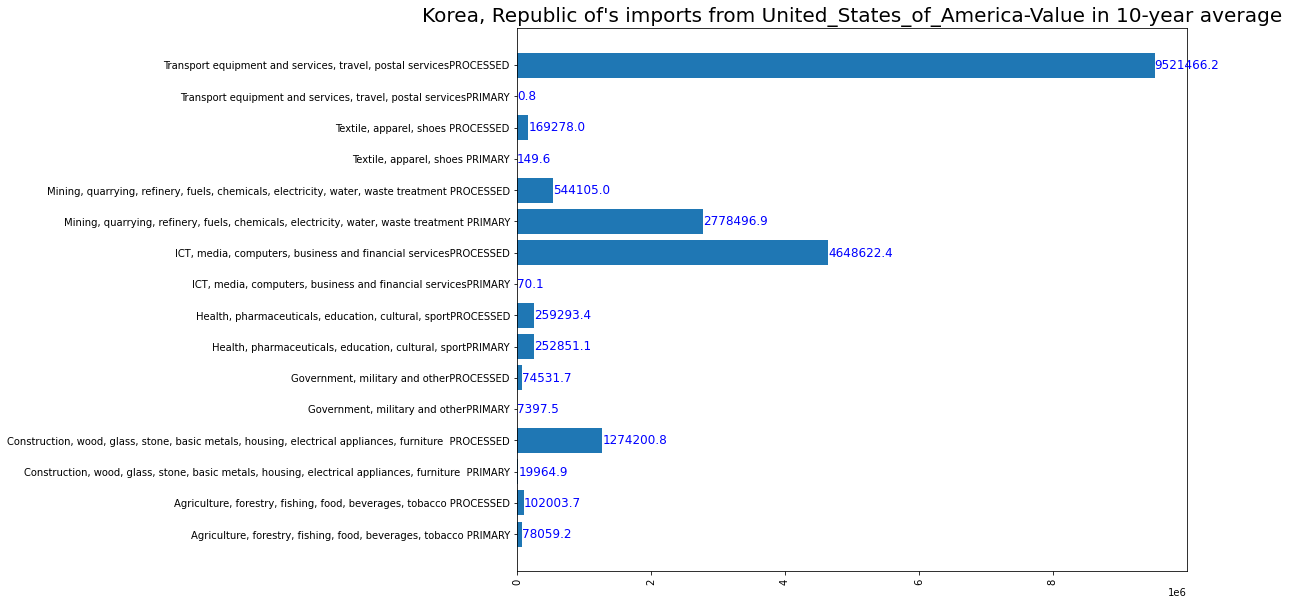

In [16]:
def make_name(name_list):
    name = name_list[0] + name_list[1]
    return name


def Problem2_graph(country_name, option):
    import_file = korea_import_dic[country_name]
    export_file = korea_export_dic[country_name]
    df_import = pd.read_csv('./data2_csv/' + import_file)
    df_export = pd.read_csv('./data2_csv/' + export_file)
    df_code = pd.read_excel('./data3/HS2012-17-BEC5 -- 08 Nov 2018.xlsx')
    
    
    df_import.loc[:, 'Product code'][:-1] = [int(x) for x in df_import.loc[:, 'Product code'][:-1]]
    df_export.loc[:, 'Product code'][:-1] = [int(x) for x in df_export.loc[:, 'Product code'][:-1]]


    ## colums 이름 바꿈
    df_import.columns = ['Product code', 'Product label', 'import_2012', 'import_2013', 'import_2014', 'import_2015', 'import_2016',
            'import_2017', 'import_2018',' import_2019', 'import_2020', 'import_2021',
            'exports_to_world', 'exports_to_world_2012', 'exports_to_world_2013', 'exports_to_world_2014',
             'exports_to_world_2015', 'exports_to_world_2016', 'exports_to_world_2017',
             'exports_to_world_2018', 'exports_to_world_2019', 'exports_to_world_2020', 'exports_to_world_2021',
             'imports_from_world', 'imports_from_world_2012', 'imports_from_world_2013', 'imports_from_world_2014',
             'imports_from_world_2015', 'imports_from_world_2016', 'imports_from_world_2017',
             'imports_from_world_2018', 'imports_from_world_2019', 'imports_from_world_2020', 'imports_from_world_2021']
    df_export.columns = ['Product code', 'Product label', 'import_2012', 'import_2013', 'import_2014', 'import_2015', 'import_2016',
             'import_2017', 'import_2018',' import_2019', 'import_2020', 'import_2021',
             'exports_to_world', 'exports_to_world_2012', 'exports_to_world_2013', 'exports_to_world_2014',
              'exports_to_world_2015', 'exports_to_world_2016', 'exports_to_world_2017',
             'exports_to_world_2018', 'exports_to_world_2019', 'exports_to_world_2020', 'exports_to_world_2021',
             'imports_from_world', 'imports_from_world_2012', 'imports_from_world_2013', 'imports_from_world_2014',
             'imports_from_world_2015', 'imports_from_world_2016', 'imports_from_world_2017',
             'imports_from_world_2018', 'imports_from_world_2019', 'imports_from_world_2020', 'imports_from_world_2021']


    data = df_code.loc[:, ['HS6', 'BEC5EndUse','BEC5Code1', 'BEC5Category', 'BEC5Processing']]
    data.columns = ['Product code','BEC5EndUse', 'BEC5Code1', 'BEC5Category', 'BEC5Processing']
    
    result1 = pd.merge(data, df_import, on='Product code')
    result2 = pd.merge(data, df_export, on='Product code')
    #result1['BEC5Processing'] = result1['BEC5Processing'].fillna("No")
    #result2['BEC5Processing'] = result1['BEC5Processing'].fillna("No")

    BEC5Category = set(result1['BEC5Category'])
    BEC5Processing = set(result1['BEC5Processing'])
    BEC5Code1 = set(result1['BEC5Code1'])
    
    import_df = result1.loc[:, ['Product code', 'BEC5Category', 'BEC5Processing', 'Product label', 'import_2012', 'import_2013',
       'import_2014', 'import_2015', 'import_2016', 'import_2017',
       'import_2018', ' import_2019', 'import_2020', 'import_2021']]

    import_df['10years_mean'] = import_df.loc[:, ['import_2012', 'import_2013',
       'import_2014', 'import_2015', 'import_2016', 'import_2017',
       'import_2018', ' import_2019', 'import_2020', 'import_2021']].mean(axis='columns')

    export_df = result2.loc[:, ['Product code', 'BEC5Category', 'BEC5Processing', 'Product label', 'import_2012', 'import_2013',
       'import_2014', 'import_2015', 'import_2016', 'import_2017',
       'import_2018', ' import_2019', 'import_2020', 'import_2021']]

    export_df['10years_mean'] = export_df.loc[:, ['import_2012', 'import_2013',
       'import_2014', 'import_2015', 'import_2016', 'import_2017',
       'import_2018', ' import_2019', 'import_2020', 'import_2021']].mean(axis='columns')
    
    import_df['import_max'] = import_df.groupby(['BEC5Category', 'BEC5Processing'])['10years_mean'].transform(max)
    export_df['import_max'] = export_df.groupby(['BEC5Category', 'BEC5Processing'])['10years_mean'].transform(max)
    if option == 'import':
        df = import_df[(import_df['10years_mean'] == import_df['import_max'])][['BEC5Category', 'BEC5Processing', '10years_mean']]
    if option == 'export':
        df = export_df[(export_df['10years_mean'] == export_df['import_max'])][['BEC5Category', 'BEC5Processing', '10years_mean']]
    
    dataFrame = df.groupby(['BEC5Category', 'BEC5Processing']).max()
    
    dataFrame_index = []
    dataFrame_values = list(dataFrame.values)

    for name_list in dataFrame.index:
        name = make_name(name_list)
        dataFrame_index.append(name)
        
    x = [x[0] for x in dataFrame_values]
    labels = dataFrame_index

    plt.figure(figsize=(12,10))
    barh = plt.barh(labels, x)
    plt.title("Korea, Republic of's imports from " + country_name + '-Value in 10-year average', fontsize=20)
    plt.xticks(rotation=90)
    y = labels
    # 숫자 넣는 부분
    for i, v in enumerate(x):
        plt.text(v, y[i], x[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 12, 
                 color='blue',
                 horizontalalignment='left',   # horizontalalignment (left, center, right)
                 verticalalignment='center')
        
    plt.show()
    return
    
    
country_text = '국가번호를 입력해 주세요.(숫자만 입력)\n1. China\n2. Viet_Nam\n3. Singapore\n4. Taipei__Chinese\n5. Australia\n6. Russian_Federation\n7. Germany\n8. Japan\n9. United_States_of_America\n10. Saudi_Arabia\n11. India\n'
country_dic = {0 : 'korea', 1 : 'China', 2 : 'Viet_Nam', 3 : 'Singapore', 4 : 'Taipei__Chinese', 5 : 'Australia', 6 : 'Russian_Federation', 7 : 'Germany', 8 : 'Japan', 9 : 'United_States_of_America', 10 : 'Saudi_Arabia', 11 : 'India' }
country_name = ''
country_num = 0

while country_dic[country_num] not in korea_import_dic.keys():
    country_num = int(input(country_text))
    country_name = country_dic[country_num]

number = 0
while number != 1 and number != 2:
    number = int(input('수출 자료와 수입 자료중 하나를 선택해 번호를 입력해 주세요(숫자만 입력)\n1. 수입\n2. 수출\n'))
    if number == 1:
        option = 'import'
    elif number == 2:
        option = 'export'
    
Problem2_graph(country_name, option)
